 HYPOTHESIS TESTING QUIZ

Using the  Wine Quality Dataset, test the claim that Wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.power import TTestIndPower, TTestPower


In [2]:
import pandas as pd
df = pd.read_csv("winequality-red.csv", delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
median_quality=df.quality.median()
median_quality

6.0

In [6]:
High_quality = df[df['quality'] > median_quality] [['quality', 'alcohol']]
High_quality


,quality,alcohol
7,7,10.00
8,7,9.50
16,7,10.50
37,7,9.70
62,7,9.50
...,...,...
1541,7,10.90
1544,7,11.20
1549,8,11.40
1555,7,10.55


In [7]:
low_quality = df[df['quality'] <= median_quality] [['quality', 'alcohol']]
low_quality



,quality,alcohol
0,5,9.4
1,5,9.8
2,5,9.8
3,6,9.8
4,5,9.4
...,...,...
1594,5,10.5
1595,6,11.2
1596,6,11.0
1597,5,10.2


In [8]:
df.groupby('quality') [['alcohol']].describe()

alcohol                                                        
          count       mean       std  min     25%     50%     75%   max
quality                                                                
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0

 Formulate hypothesis


 *$H0$*:wines with higher rating have a less median alcohol content than wines with a lower quality rating
 
 *$Ha$*:wines with higher rating have a higher median alcohol content than wines with a lower quality rating.

Conducting a test to confirm normality, homogenity and heterodescedacity

* Set the p-value as 0.05
* We fail to reject the null hypothesis because the p-value is greater than ```0.05```, meaning there is homogenity of variance and we can proceed.

Bartlette's test

In [9]:
from scipy.stats import bartlett
from statsmodels.stats.power import TTestIndPower, TTestPower
high_qlt = (High_quality['alcohol'])
low_qlt = low_quality['alcohol']

stats, p = bartlett(high_qlt, low_qlt)

print(stats, p)

0.3171862406986453 0.5733035382163396



* The p-value being greater than 0.05, we conclude there is lack of sufficient evidence of heteroscedasticity we can thus continue with t-test

Testing for the normality of the data

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

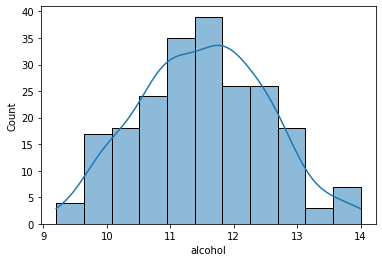

In [10]:
sns.histplot(data=High_quality, x="alcohol", kde=True)

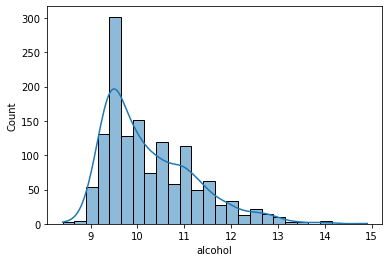

In [11]:
sns.histplot(data=low_quality, x="alcohol", kde=True);

In [27]:
from scipy.stats import shapiro

In [37]:
from scipy.stats import shapiro
#stat, p = stats.shapiro(High_quality["alcohol"].values)
print(stats, p)

<module 'scipy.stats' from 'C:\\Users\\User\\anaconda3\\envs\\learn-env\\lib\\site-packages\\scipy\\stats\\__init__.py'> 0.23225747048854828


In [38]:
stat, p = stats.ttest_ind(High_quality["alcohol"],low_quality ["alcohol"])
stat, p

(17.822763607394528, 6.016774226316707e-65)

The p_value is less than 
 of 0.05, meaning we Alcohol content increase is a statistically significant event at the 95% confidence level.We Reject the Null Hypothesis